In [2]:
import numpy as np
import pandas as pd
from matplotlib import mlab
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# import 👌👌👌👌👌👌 from ZA

# Conjunto de dados 1

Esses dados consistem do número de 'Likes' para cada um dos 9000 usuários, ao longo de 6 meses, em cada uma das 210 categorias que o Facebook atribui a cada página

Cada linha de spatial é um usuário e cada coluna é uma categoria.

In [18]:
# loading the spatial dataset as a numpy array

data = np.loadtxt('data/social/data/spatial_data.txt')
spatial = data[:,1:]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(spatial)

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,3.000,3.000,0.000,6.000,0.000,2.000,0.000,...,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,2.000,8.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
7,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


# Conjunto de dados 2

Esses dados contém o número de 'Likes' para cada um dos 9000 usuários, ao longo de 6 meses, agregados diariamente.

Linhas de FBTemporal são usuários e colunas são dias.

In [4]:
# data = np.loadtxt('data/social/data/temporal_data.txt')
# FBTemporal = data[:,1:]
# pd.DataFrame(FBTemporal[:,:])

In [5]:
# standardizing the data matrix to make the use of PCA possible (in each column, mean = 0 and standard deviation = 1)

std_spatial = StandardScaler().fit_transform(spatial)
pd.DataFrame(std_spatial).head(10)

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,-0.141,-0.056,-0.267,-0.178,-0.256,-0.323,-0.276,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.143,-0.138,4.128,-0.116,-0.199,-0.056,-0.266,-0.205
1,-0.141,-0.056,-0.267,-0.178,-0.256,-0.323,-0.276,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.252,-0.138,-0.161,-0.116,-0.199,-0.056,-0.266,-0.205
2,-0.141,-0.056,-0.267,0.901,1.425,-0.323,1.494,-0.172,4.691,-0.015,...,-0.083,-0.018,0.182,-0.138,-0.161,-0.116,-0.199,-0.056,2.044,0.507
3,-0.141,-0.056,-0.267,-0.178,-0.256,-0.323,-0.276,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.279,-0.138,-0.161,-0.116,-0.199,-0.056,-0.266,-0.205
4,-0.141,-0.056,-0.267,-0.178,-0.256,-0.323,0.019,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.279,-0.138,-0.161,-0.116,-0.199,-0.056,-0.266,-0.205
5,-0.141,-0.056,-0.267,-0.178,-0.256,-0.323,-0.276,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.279,-0.138,-0.161,-0.116,-0.199,-0.056,-0.266,-0.205
6,-0.141,-0.056,-0.267,-0.178,-0.256,-0.323,-0.276,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.279,-0.138,-0.161,-0.116,-0.199,-0.056,-0.266,-0.027
7,-0.141,-0.056,-0.267,-0.178,-0.256,-0.033,-0.276,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.252,-0.138,-0.161,-0.116,-0.199,-0.056,-0.266,-0.205
8,-0.141,-0.056,-0.267,-0.178,-0.256,-0.033,-0.276,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.252,-0.138,-0.161,-0.116,-0.199,-0.056,-0.266,-0.116
9,-0.141,-0.056,-0.267,-0.178,-0.256,-0.323,-0.276,-0.172,-0.147,-0.015,...,-0.083,-0.018,-0.279,-0.138,-0.161,-0.116,-0.199,-0.056,-0.266,-0.205


In [10]:
# applying the PCA algorithm to give the normal subspace matrix which is 8982 x 5.
# this allows the points of the user behavior matrix (X) to be projected into the normal subspace,
# and it gives us the normal behavior portion. subtracting the normal behavior portion from X, we get
# the residual portion of user behavior.

pca = PCA(n_components=5)
pca.fit(std_spatial)
normal_subspace = pca.components_.T             # transposing because PCA in sklearn makes each eigenvector become a line instead of a column.
normal_behavior_portion = (np.matmul(np.matmul(normal_subspace, normal_subspace.T), std_spatial.T)).T
residual_behavior_portion = spatial- normal_behavior_portion

# 210x5 5x210 210x8982 ?????

# pd.DataFrame(normal_subspace)
# pd.DataFrame(normal_behavior_portion).head(10)
pd.DataFrame(residual_behavior_portion).head(10)
# pd.DataFrame(normal_subspace).head(10)

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.165,0.071,0.226,0.103,0.242,0.063,0.228,-0.050,-0.108,-0.001,...,0.003,-0.026,5.159,0.018,1.025,0.085,0.072,0.004,0.204,0.086
1,0.136,0.088,0.263,0.173,0.265,0.257,0.249,0.135,0.181,-0.002,...,0.073,0.010,1.273,0.132,0.159,0.117,0.207,0.042,0.251,0.188
2,-0.338,0.418,-0.756,2.408,2.052,-0.740,5.362,-0.475,1.240,0.003,...,-0.284,-0.029,16.057,-0.419,-0.633,-0.418,-0.854,-0.130,1.191,7.281
3,0.135,0.087,0.263,0.173,0.257,0.250,0.249,0.133,0.178,-0.002,...,0.072,0.011,0.276,0.135,0.158,0.119,0.210,0.045,0.243,0.184
4,0.134,0.079,0.253,0.184,0.261,0.257,1.238,0.137,0.189,-0.002,...,0.074,0.011,0.266,0.128,0.158,0.113,0.203,0.039,0.247,0.200
5,0.142,0.089,0.268,0.187,0.267,0.255,0.253,0.132,0.178,-0.002,...,0.073,0.010,0.277,0.132,0.158,0.119,0.209,0.042,0.252,0.198
6,0.122,0.084,0.224,0.169,0.239,0.243,0.211,0.127,0.177,-0.001,...,0.068,0.010,0.230,0.110,0.140,0.096,0.173,0.031,0.229,2.188
7,0.131,0.081,0.222,0.189,0.264,1.266,0.208,0.132,0.191,-0.001,...,0.073,0.009,1.220,0.098,0.141,0.088,0.162,0.020,0.255,0.219
8,0.132,0.082,0.263,0.164,0.245,1.231,0.249,0.124,0.161,-0.002,...,0.067,0.010,1.279,0.137,0.154,0.122,0.213,0.049,0.229,1.168
9,0.142,0.090,0.267,0.188,0.264,0.252,0.253,0.131,0.175,-0.002,...,0.072,0.010,0.277,0.132,0.157,0.119,0.209,0.043,0.249,0.198


In [7]:
#😂👌

In [19]:
# calculating the l2 norm of each line in the residual behavior portion matrix.
# the l2 norm is the squared root of the sum of squares of each element in a vector.
# this value, along with a given threshold, is what makes possible to detect anomalous users.

soma = np.sqrt(np.sum(np.power(residual_behavior_portion, 2), axis = 1))
# pd.DataFrame(soma)
soma = sorted(soma, reverse = False)
# pd.DataFrame(sorted(soma, reverse=False))
# pd.DataFrame(np.argsort(-soma))

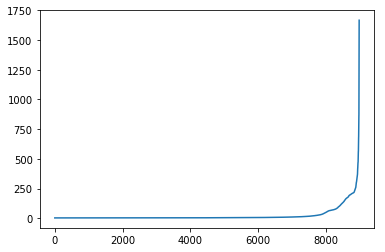

In [11]:
# plotting the percentile graph for values in the sum matrix (the matrix that will be used to define anomalous users)

# p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
# perc = mlab.prctile(soma, p=p)
plt.plot(soma)
# plt.plot((len(soma) - 1), perc, 'ro')
plt.show()